In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


# **1. Understanding Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
df.head()
     

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.isna().sum() # Here no missing values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# **2. Outlier Detection and Handling**

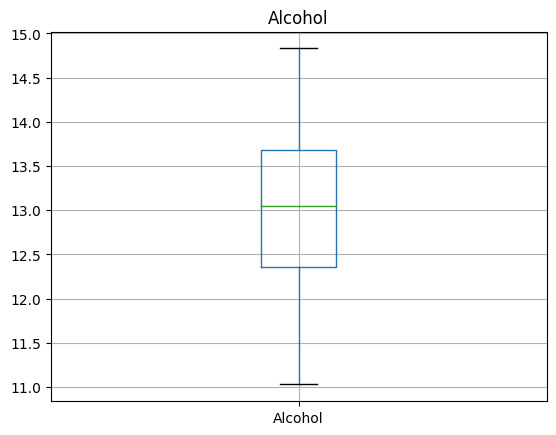

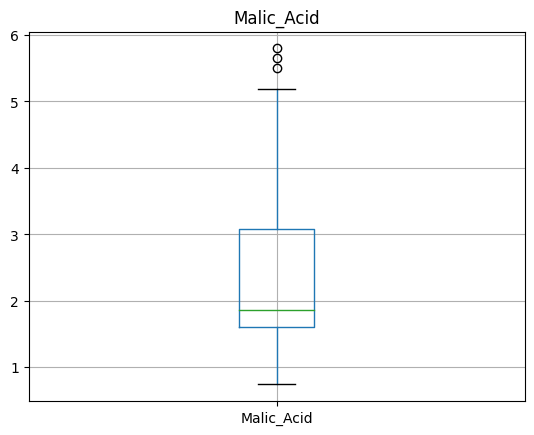

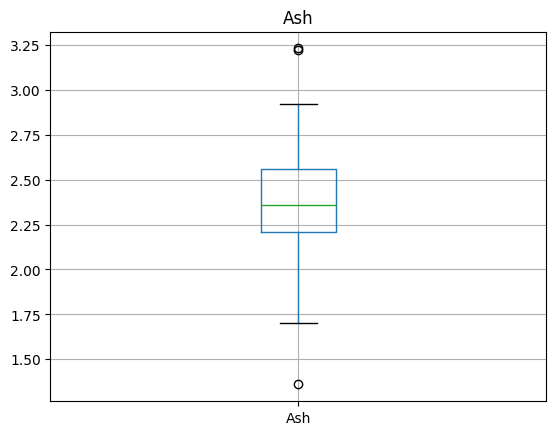

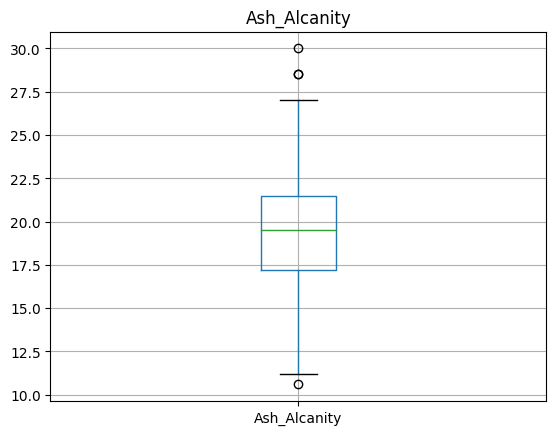

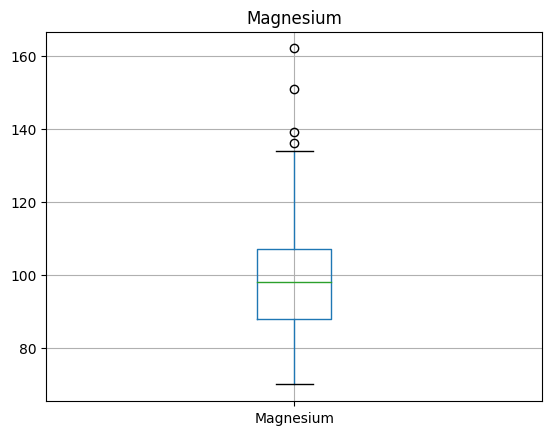

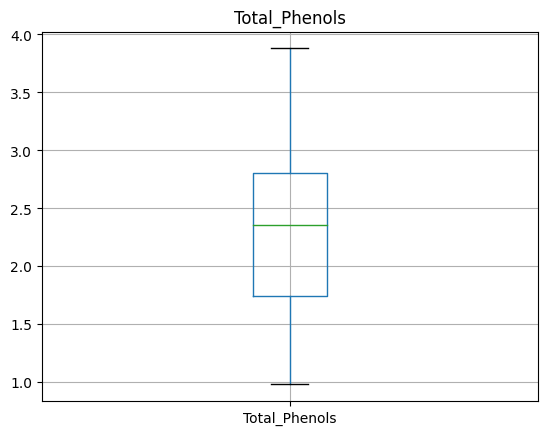

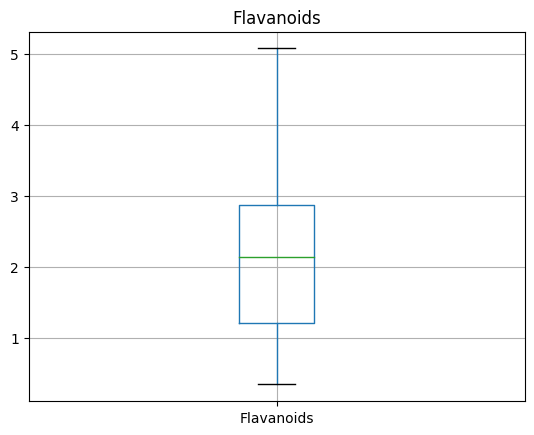

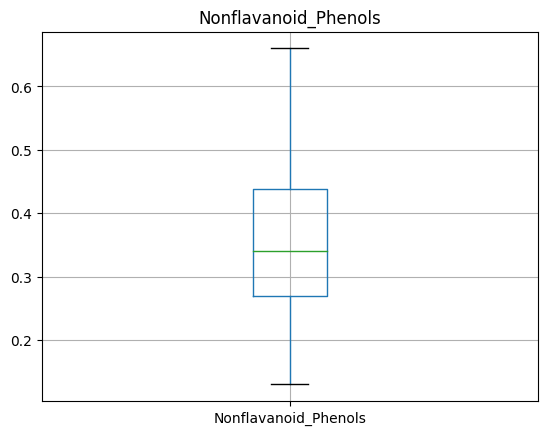

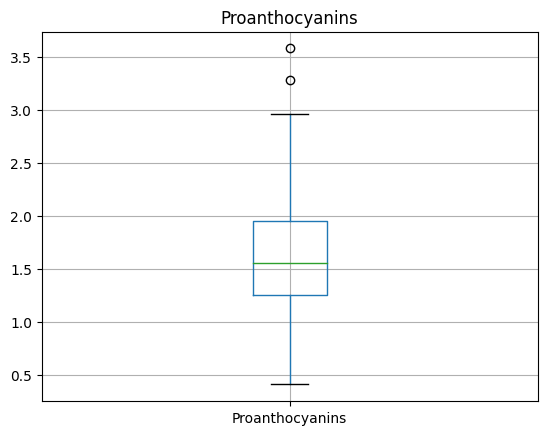

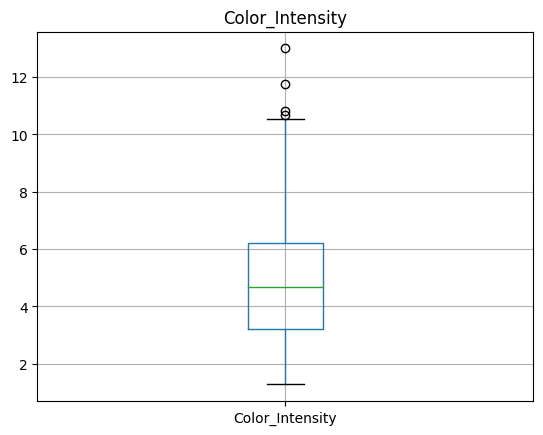

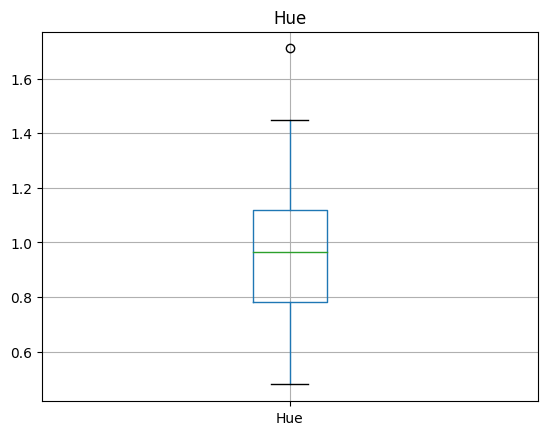

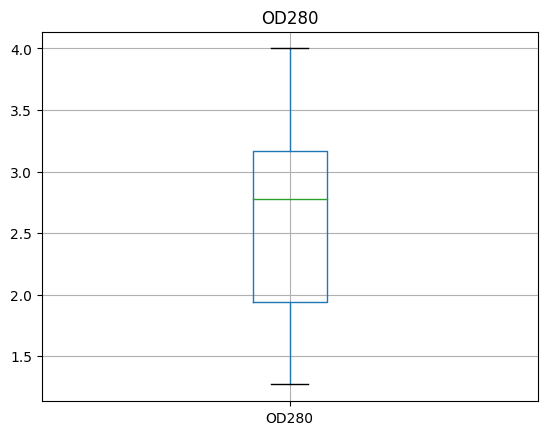

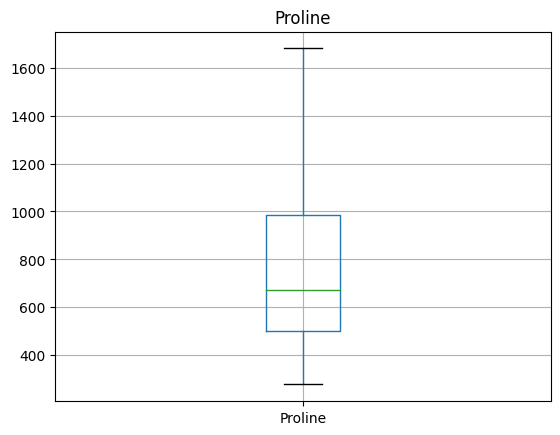

In [5]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is not of object type (i.e., numeric)
        plt.figure()
        df.boxplot([col])
        plt.title(col)
        plt.show()  # This line will display each plot

In [6]:

for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)

        # To find IQR
        iqr = Q3 - Q1

        # To find lower bound and upper bound
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr

        # Capping the outliers
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                           np.where(df[col] < lower_bound, lower_bound, df[col]))

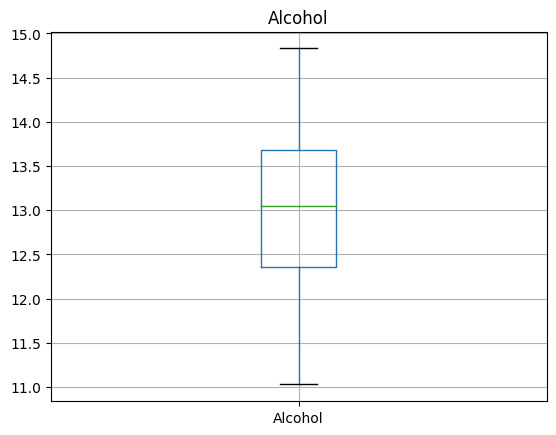

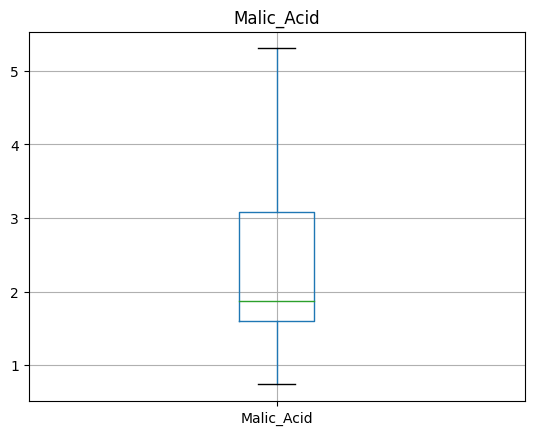

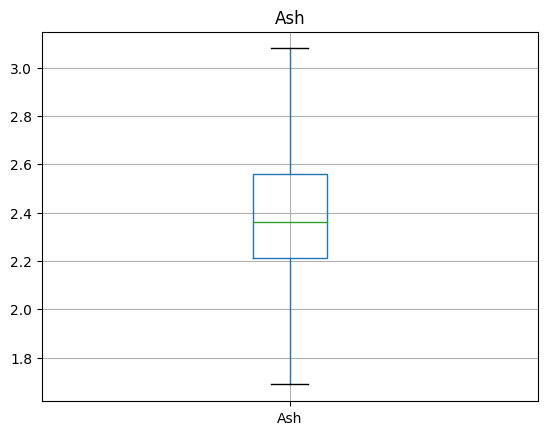

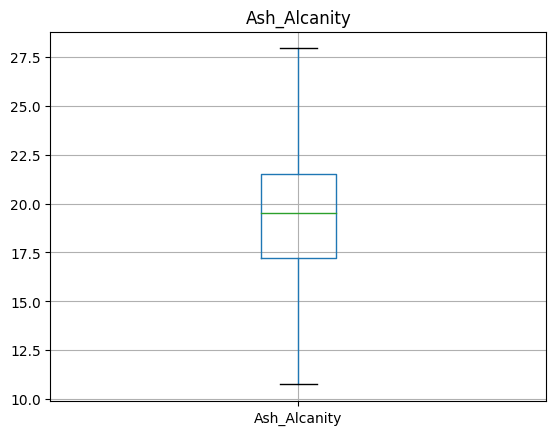

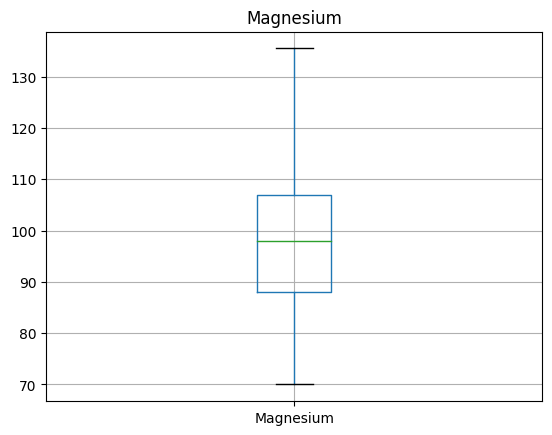

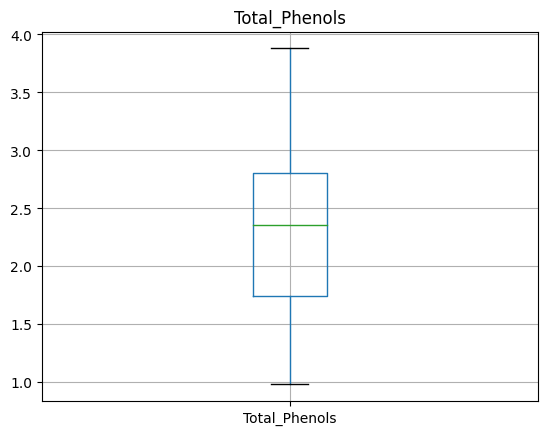

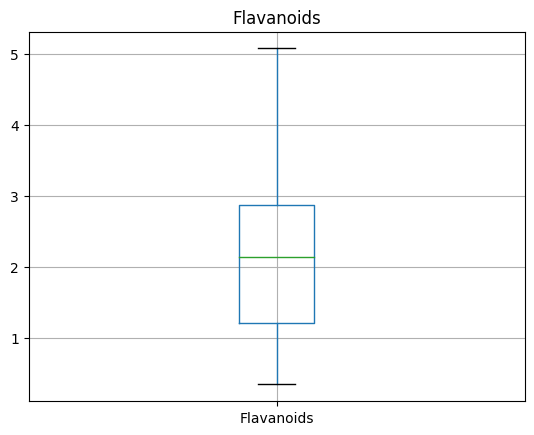

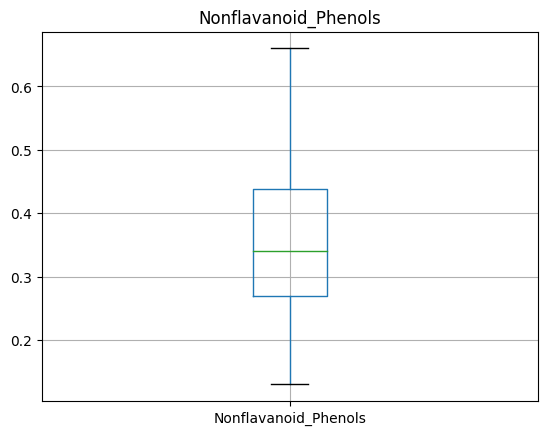

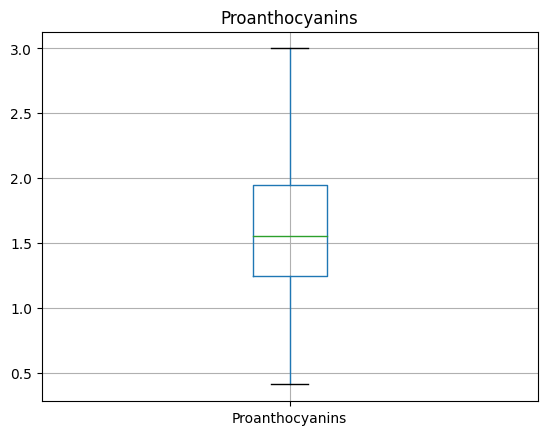

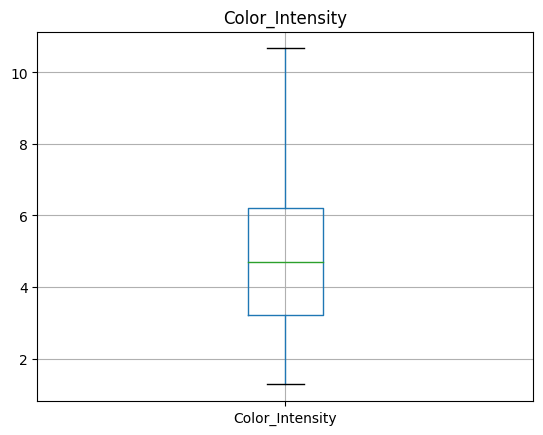

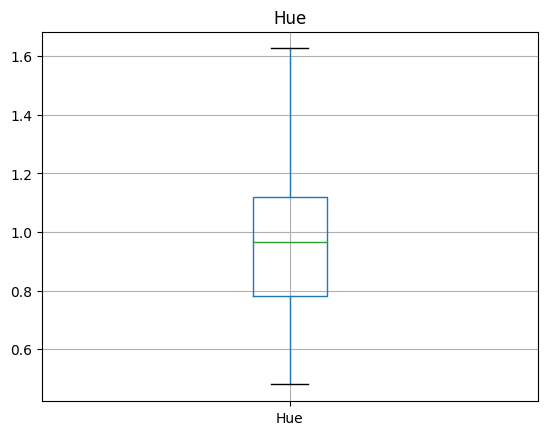

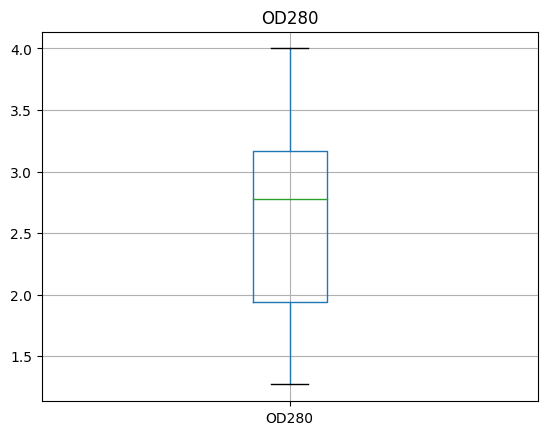

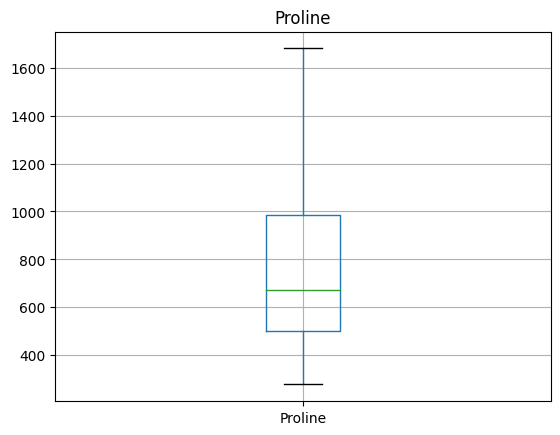

In [7]:

for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is not of object type (i.e., numeric)
        plt.figure()
        df.boxplot([col])
        plt.title(col)
        plt.show()  # This line will display each plot

# **3. Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with numeric columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame (optional)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()  # Display the first few rows of the scaled DataFrame

# Here Encoding is not needed because here does not have object type

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


# **4. K-Means Clustering**

**a. Finding the Optimum Number of Clusters Using the Elbow Method**

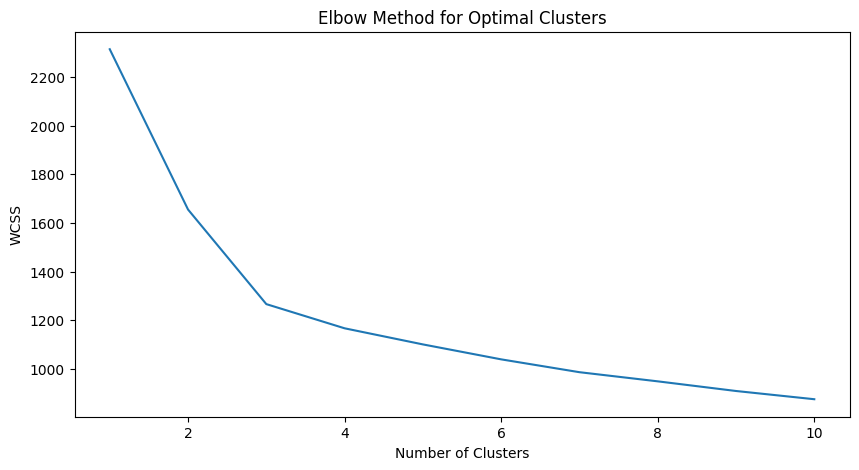

In [9]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
x = scaler.fit_transform(df)

In [11]:
# From Graph, it's clear that k has 3 is better valure

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

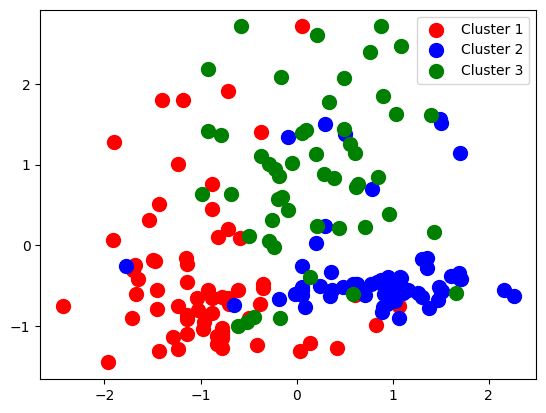

In [12]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='green',label='Cluster 3')

plt.legend()
plt.show()


**b. Silhouette Score to Validate the Optimum Number of Clusters**

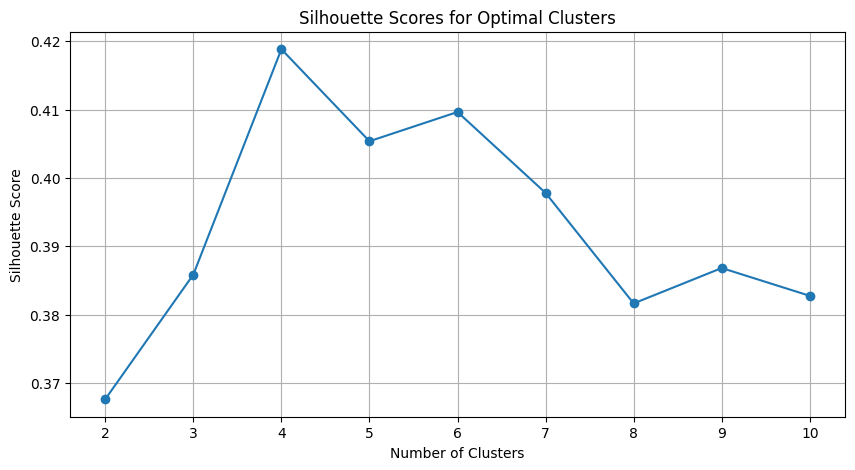

The highest silhouette score is 0.4188 for 4 clusters.


In [13]:
# Example synthetic data (replace with your actual data)
np.random.seed(0)
df_scaled = np.random.rand(200, 2)  # Replace with your actual scaled feature data

# List to hold silhouette scores
silhouette_scores = []
num_clusters_range = range(2, 11)  # Range of cluster numbers to try

for i in num_clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()

# Finding and printing the highest silhouette score
max_score = max(silhouette_scores)
best_num_clusters = num_clusters_range[silhouette_scores.index(max_score)]

print(f"The highest silhouette score is {max_score:.4f} for {best_num_clusters} clusters.")

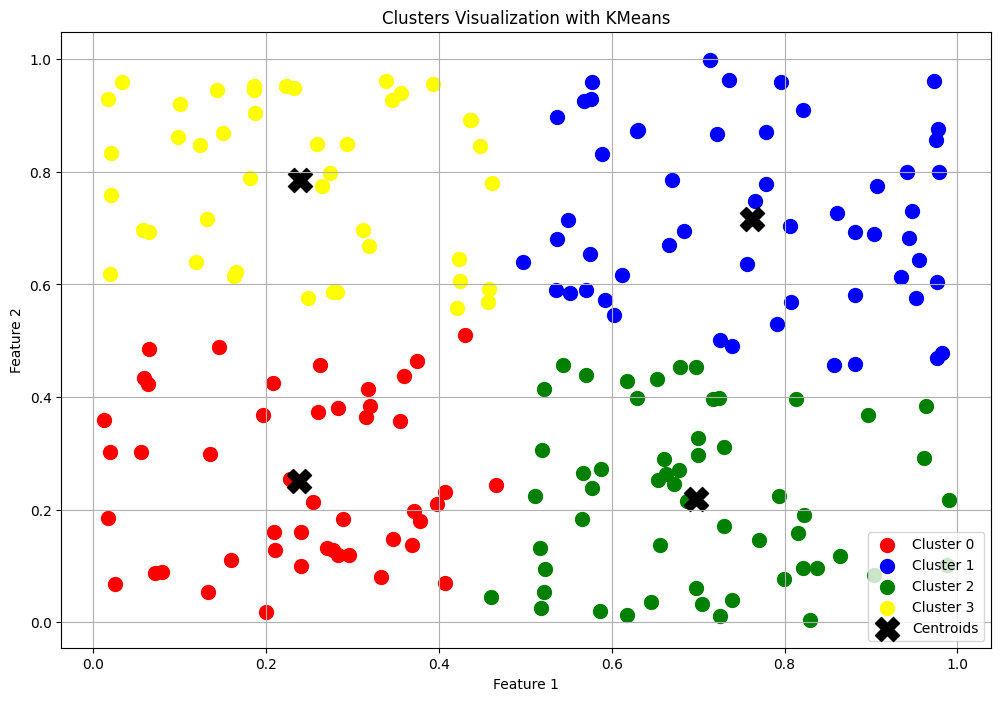

In [14]:
# Fit the KMeans model with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'yellow']  # Define colors for 4 clusters

# Plot each cluster with a different color
for i in range(optimal_clusters):
    plt.scatter(df_scaled[labels == i, 0], df_scaled[labels == i, 1],
                s=100, c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', label='Centroids', marker='X')

plt.title('Clusters Visualization with KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
optimal_clusters = 4  # Choose based on elbow or silhouette
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

kmeans_labels

array([1, 1, 3, 3, 2, 1, 1, 0, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 1, 1, 0, 2,
       1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 3, 2, 2,
       1, 3, 3, 0, 2, 2, 2, 1, 3, 1, 3, 3, 2, 2, 1, 1, 1, 1, 3, 0, 2, 2,
       0, 1, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2,
       3, 2, 3, 2, 1, 1, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 1, 2, 2, 3, 0, 1,
       1, 3, 3, 2, 1, 0, 2, 0, 0, 3, 2, 2, 2, 2, 0, 3, 1, 2, 1, 2, 0, 3,
       1, 3, 0, 1, 3, 3, 1, 1, 3, 2, 0, 1, 1, 0, 2, 2, 3, 1, 1, 0, 0, 0,
       2, 2, 0, 2, 3, 1, 0, 0, 0, 1, 0, 3, 3, 1, 0, 2, 0, 2, 2, 2, 1, 2,
       0, 1, 0, 3, 3, 2, 1, 2, 1, 2, 1, 0, 1, 3, 1, 1, 1, 2, 2, 0, 3, 3,
       0, 0], dtype=int32)

# **5. Agglomerative Clustering**

**a. Finding the Optimum Number of Clusters Using Dendrogram**

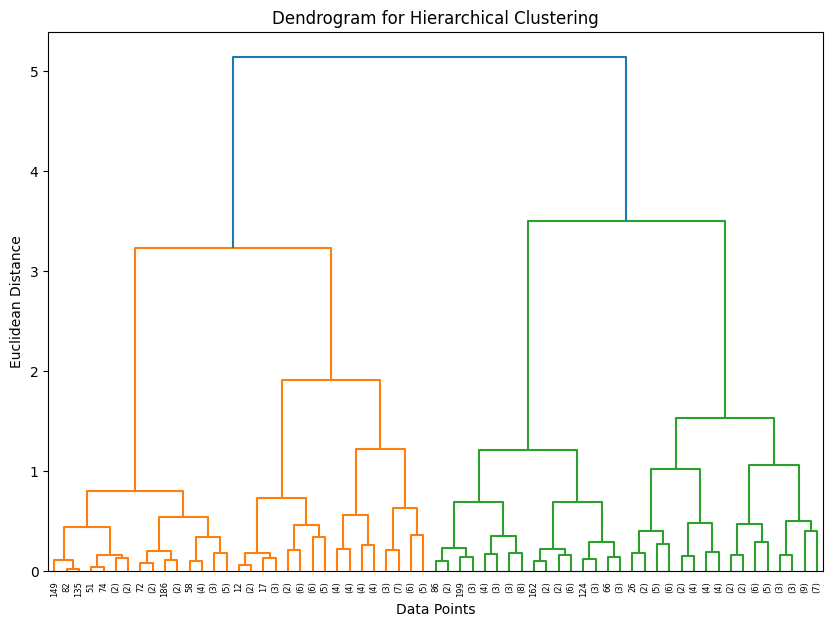

In [16]:
# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = hc.fit_predict(x)
print(y_pred) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [18]:
optimal_clusters = 2  # Choose based on dendrogram
agg_cluster = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(df_scaled)
print(agg_labels)

[1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0]


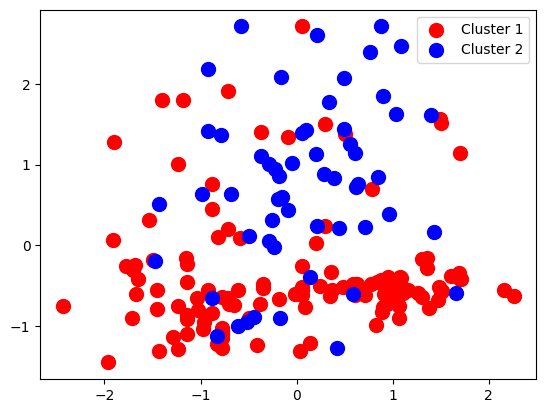

In [19]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='Cluster 2')


plt.legend()
plt.show()

# **6. DBSCAN Clustering**

**a. Understanding DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking outliers as noise.

In [20]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(df_scaled)
dbscan_labels
     

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [21]:
# Since DBSCAN may classify some points as noise (-1), we'll filter those out for silhouette score calculation
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')
else:
    print('DBSCAN resulted in a single cluster or no valid clusters.')

DBSCAN resulted in a single cluster or no valid clusters.
